#### **Task 1:** Data Exploration

Notebook: notebooks/EDA.ipynb
Steps:
- Load the dataset.
- Explore the data structure, types, and summary statistics.
- Visualize relationships between features and the target variable.
- Identify missing values and outliers.


In [2]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
#Importing the dataset

df=pd.read_csv("BostonHousing.csv")

In [4]:
#Cheking the first 5 rows of the dataset

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Getting the no of rows and columns of the dataset

df.shape

(506, 14)

In [6]:
#Getting the datatype of all the columns and 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
#Getting the summary statistics

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#Checking for null values

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
#Displaying the column names of the dataframe

df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

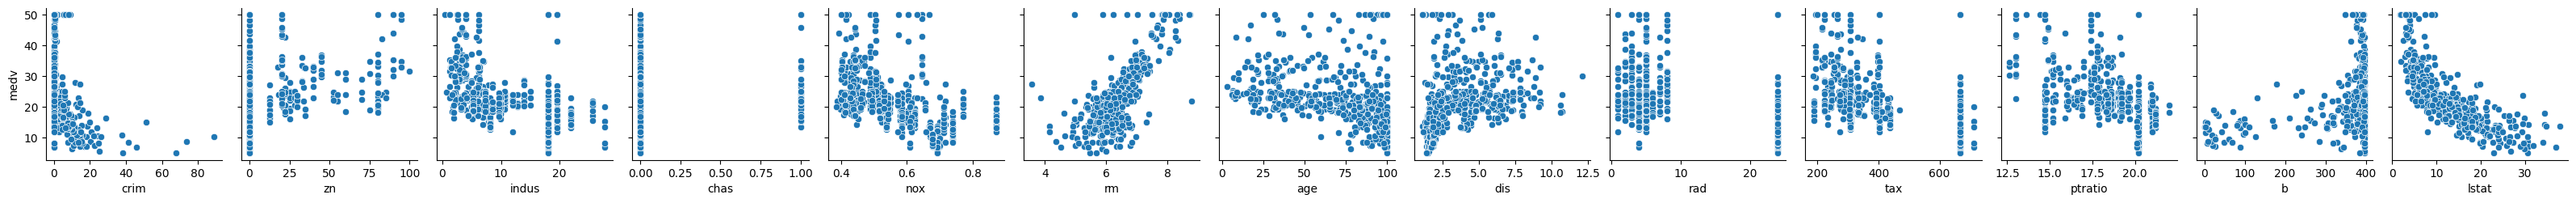

In [10]:
#Creating a pair-plot to visualize the relationship between each feature and the target feature
sns.pairplot(df, x_vars= ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'], y_vars ='medv')

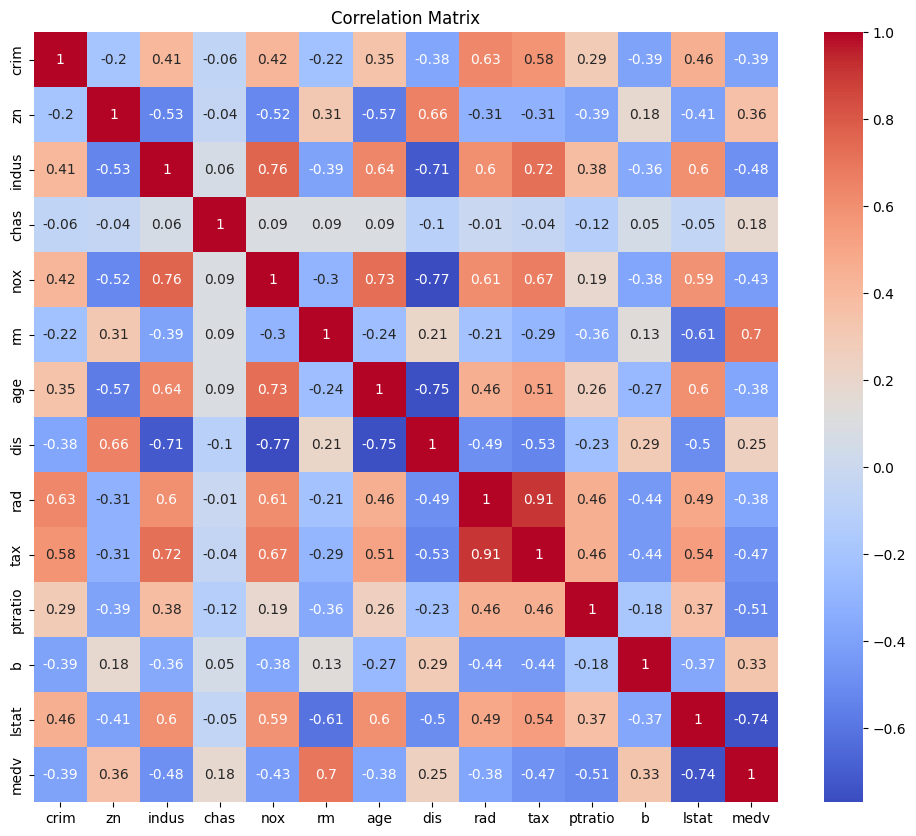

In [11]:
#Checking the correlation between features using heatmap

plt.figure(figsize=(12,10))
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Here, we can see that two features: rm and lstat are highly correlated with the feature variable medv.

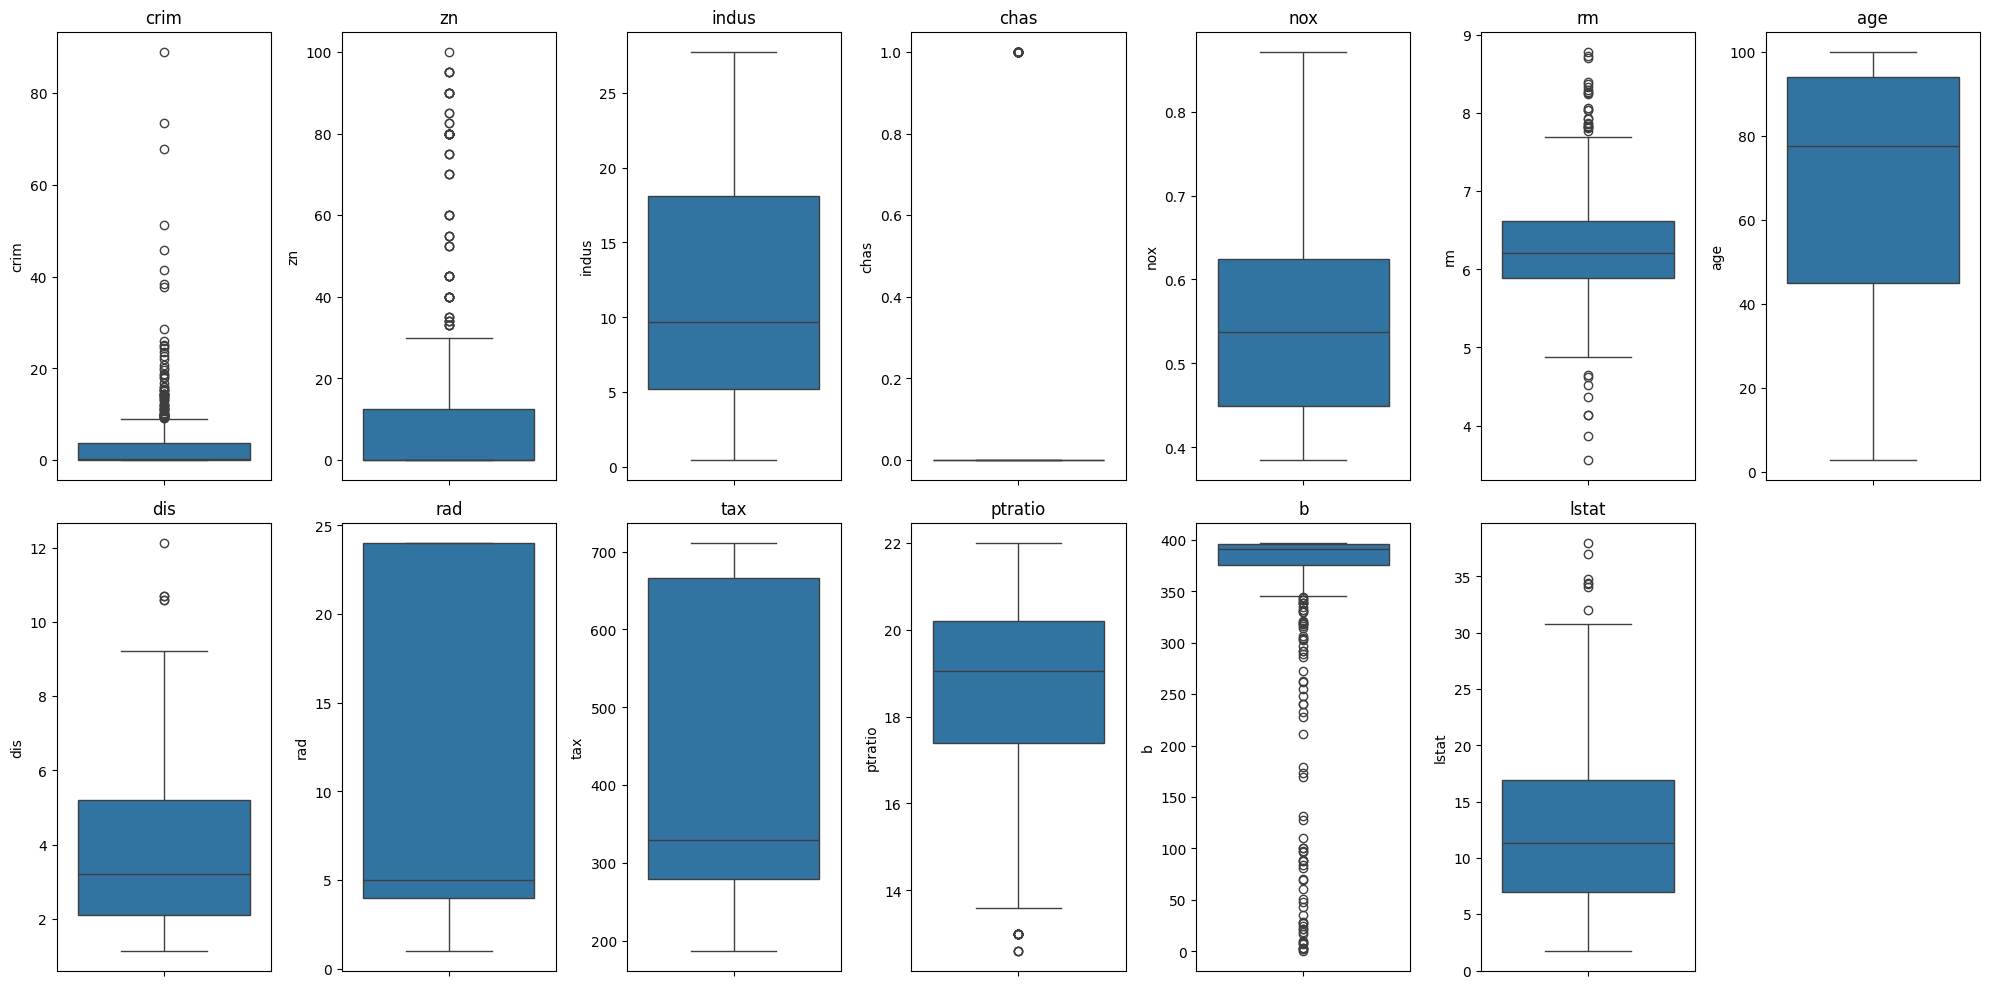

In [12]:
#Creating box plot for each feature to determine the outliers

plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(2, 7, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#### Task 2: Data Preprocessing

Notebook: notebooks/Data_Preprocessing.ipynb
Steps:
- Handle missing values and outliers.
- Encode categorical variables.
- Normalize/standardize numerical features.
- Split the data into training and testing sets.
- Script: scripts/data_preprocessing.py

In [13]:
#Removing the outliers using IQR method

def remove_outliers(df,columns):
    for column in columns:
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return df

In [14]:
df_cleaned=remove_outliers(df,df.columns)
print(f"Shape of the original dataset: {df.shape}")
print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

Shape of the original dataset: (506, 14)
Shape of the cleaned dataset: (214, 14)


In [15]:
df_cleaned.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


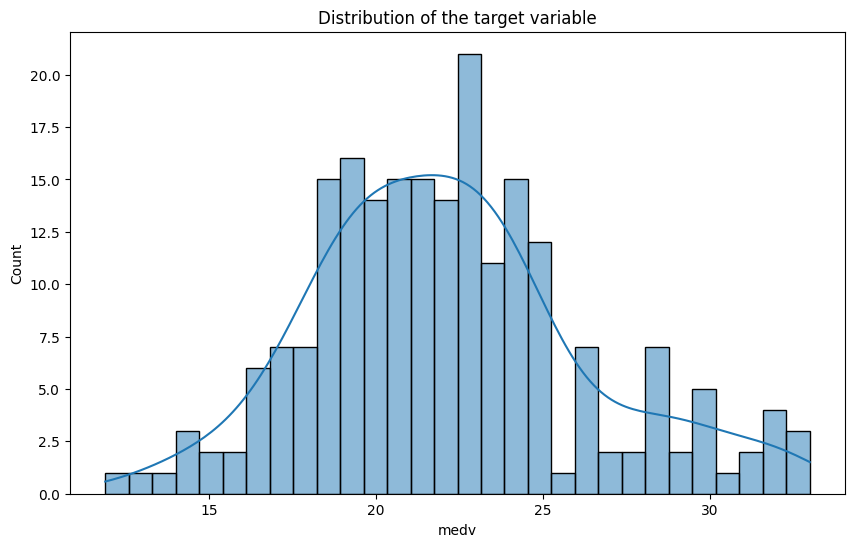

In [16]:
# Lets visualize the distribution of the target variable

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['medv'],kde=True,bins=30)
plt.title('Distribution of the target variable')
plt.show()

<Axes: xlabel='rm', ylabel='medv'>

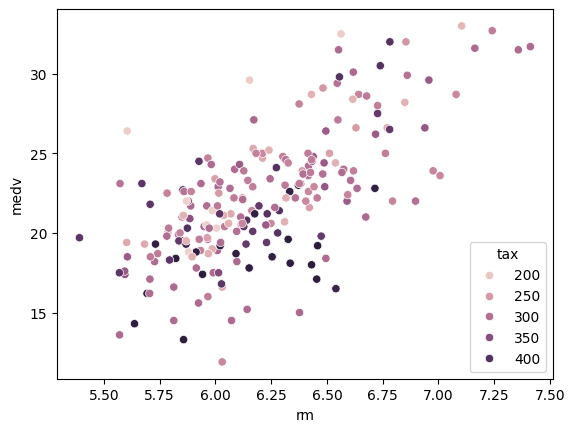

In [17]:
# Scatter plot of rm with medv

sns.scatterplot(x=df_cleaned['rm'],y=df_cleaned['medv'],hue=df_cleaned['tax'])

<Axes: xlabel='lstat', ylabel='medv'>

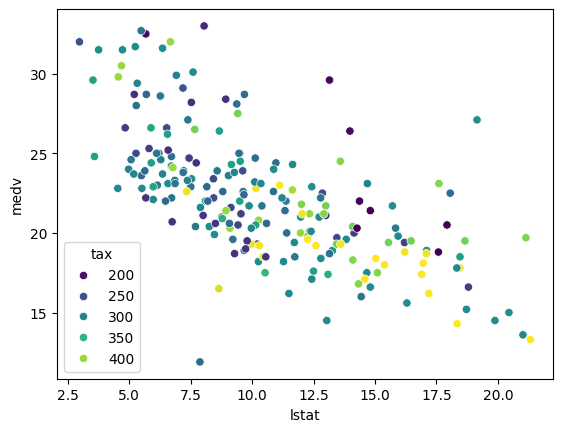

In [18]:
# Scatter plot of lstat with medv

sns.scatterplot(x=df_cleaned['lstat'],y=df_cleaned['medv'],hue=df_cleaned['tax'],palette='viridis',)

In [19]:
# Standardizing the features except the target feature

scaler = StandardScaler()
numerical_features = df_cleaned.columns.drop('medv')
df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_features]), columns=numerical_features)

# Add the target variable back to the standardized DataFrame
df_standardized['medv'] = df_cleaned['medv'].values

In [20]:
# Separating features and target variable

X = df_standardized.drop('medv', axis=1)  
y = df_standardized['medv']

In [21]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 3: Model Building and Training


Notebook: notebooks/Model_Training.ipynb Steps:

-Choose appropriate features for the model.

-Train a linear regression model.

-Perform hyperparameter tuning (if applicable).

-Script: scripts/train_model.py

In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Importing the model
from sklearn.linear_model import LinearRegression

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Task 4. Model Evaluation

Notebook: notebooks/Model_Evaluation.ipynb Steps:

-Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared.

-Plot residuals to check the assumptions of linear regression.

-Compare model performance with different feature sets or preprocessing steps.

-Script: scripts/evaluate_model.py

In [24]:
#Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the result
print(f"Mean Squared Error of the model is : {mse}")
print(f"R2 Score of the model is : {r2}")

Mean Squared Error of the model is : 3.362790001183574
R2 Score of the model is : 0.6937974135834433


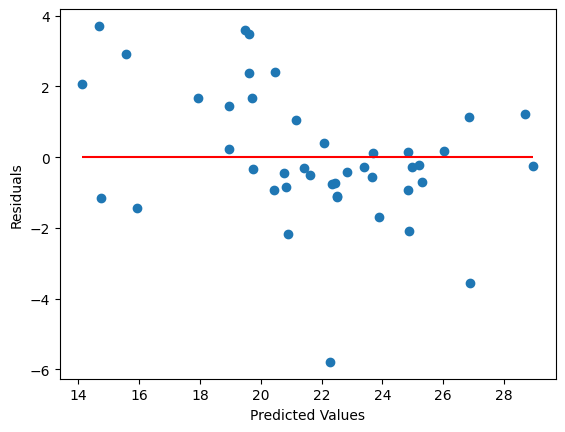

In [25]:
#Plotting residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Features selected.
* lstat
* rm
* indus
* tax
* ptratio

In [26]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [27]:
#features_sushant=['lstat','rm','tax','indus','ptratio']

In [37]:
features_sushant=['lstat','rm','tax']

In [38]:
features_sushant

['lstat', 'rm', 'tax']

In [39]:
# Standardizing the features except the target feature


df_standardized = pd.DataFrame(scaler.fit_transform(df_cleaned[features_sushant]), columns=features_sushant)

# Add the target variable back to the standardized DataFrame
df_standardized['medv'] = df_cleaned['medv'].values

In [40]:
print(df_standardized.head())

      lstat        rm       tax  medv
0 -1.360743  0.954390 -0.222626  24.0
1 -0.347699  0.546732 -1.053322  21.6
2 -1.304734  0.570556 -1.360987  28.7
3  0.453482 -0.535945  0.008123  22.9
4  2.089938 -0.112404  0.008123  27.1


In [41]:
# Separating features and target variable

X = df_standardized.drop('medv', axis=1)  
y = df_standardized['medv']

In [42]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Importing the model
from sklearn.linear_model import LinearRegression

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
#Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the result
print(f"Mean Squared Error of the model is : {mse}")
print(f"R2 Score of the model is : {r2}")

Mean Squared Error of the model is : 5.68374845768931
R2 Score of the model is : 0.48245995804881203


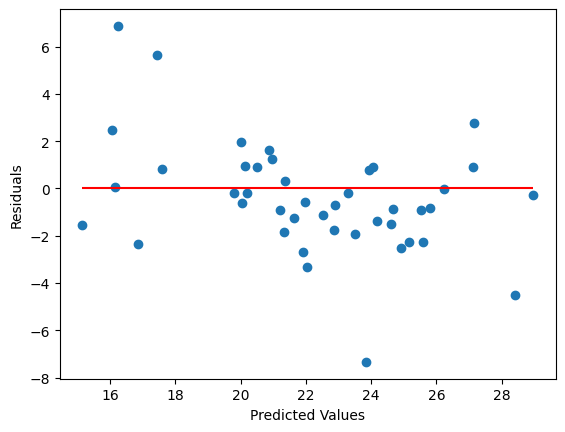

In [45]:
#Plotting residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()